**Detectarea anomaliilor**

Vaculenco Maxim 333AB



Am descarcat urmatorul set de date:

https://www.kaggle.com/datasets/jorekai/anomaly-detection-falling-people-events/data

Setul de date este conceput pentru detectarea anomaliilor în evenimente video sau în medii simulate, unde căderile sunt considerate evenimente rare și critice. În contextul detectării anomaliilor, datele includ:

Evenimente normale: Acțiuni uzuale fără incidente.
Evenimente anormale: Căderi (anomalii).

Caracteristici disponibile:
Setul de date poate include date numerice sau vectori extrași din caracteristici video, precum:
Coordonate spațiale (poziții).
Mișcări sau schimbări de viteză ale obiectelor.
Alte caracteristici generate de algoritmi de urmărire (tracking).
Pot exista coloane precum:
ID-ul evenimentului.
Timpul sau cadrul video (dacă este relevant).
Caracteristici spațiale.
Etichete (normal/anomalie).





Vom incepe prin a alege un set de date!

In [ ]:
from google.colab import files

uploaded = files.upload()  # Se deschide un dialog pentru încărcare


Saving data_0.csv to data_0.csv
Saving data_1.csv to data_1.csv
Saving data_2.csv to data_2.csv
Saving data_3.csv to data_3.csv
Saving data_4.csv to data_4.csv
Saving data_5.csv to data_5.csv
Saving data_6.csv to data_6.csv
Saving data_7.csv to data_7.csv
Saving data_8.csv to data_8.csv
Saving data_9.csv to data_9.csv
Saving data_10.csv to data_10.csv
Saving data_11.csv to data_11.csv
Saving data_12.csv to data_12.csv
Saving data_13.csv to data_13.csv
Saving data_14.csv to data_14.csv
Saving data_15.csv to data_15.csv
Saving data_16.csv to data_16.csv
Saving data_17.csv to data_17.csv
Saving data_18.csv to data_18.csv
Saving data_19.csv to data_19.csv


Acum le vom incarca.

In [ ]:
import pandas as pd

data = pd.read_csv('data_0.csv')
print(data.head())


           x          y          z  010-000-024-033  010-000-030-096  \
0  18.495860  13.766527  14.362624              0.0              0.0   
1  18.501072  13.827225  14.270268              0.0              0.0   
2  18.405950  13.868976  14.094804              1.0              0.0   
3  18.444572  13.910701  14.116078              0.0              1.0   
4  18.418470  13.933917  14.320566              0.0              0.0   

   020-000-032-221  020-000-033-111  anomaly  
0              0.0              1.0      0.0  
1              1.0              0.0      0.0  
2              0.0              0.0      0.0  
3              0.0              0.0      0.0  
4              0.0              1.0      0.0  


Curatarea (eliminam randurile/coloanele incomplete)

In [ ]:
data = data.dropna()
print(data.head())


           x          y          z  010-000-024-033  010-000-030-096  \
0  18.495860  13.766527  14.362624              0.0              0.0   
1  18.501072  13.827225  14.270268              0.0              0.0   
2  18.405950  13.868976  14.094804              1.0              0.0   
3  18.444572  13.910701  14.116078              0.0              1.0   
4  18.418470  13.933917  14.320566              0.0              0.0   

   020-000-032-221  020-000-033-111  anomaly  
0              0.0              1.0      0.0  
1              1.0              0.0      0.0  
2              0.0              0.0      0.0  
3              0.0              0.0      0.0  
4              0.0              1.0      0.0  


Vom verifica distributiile variabilelor

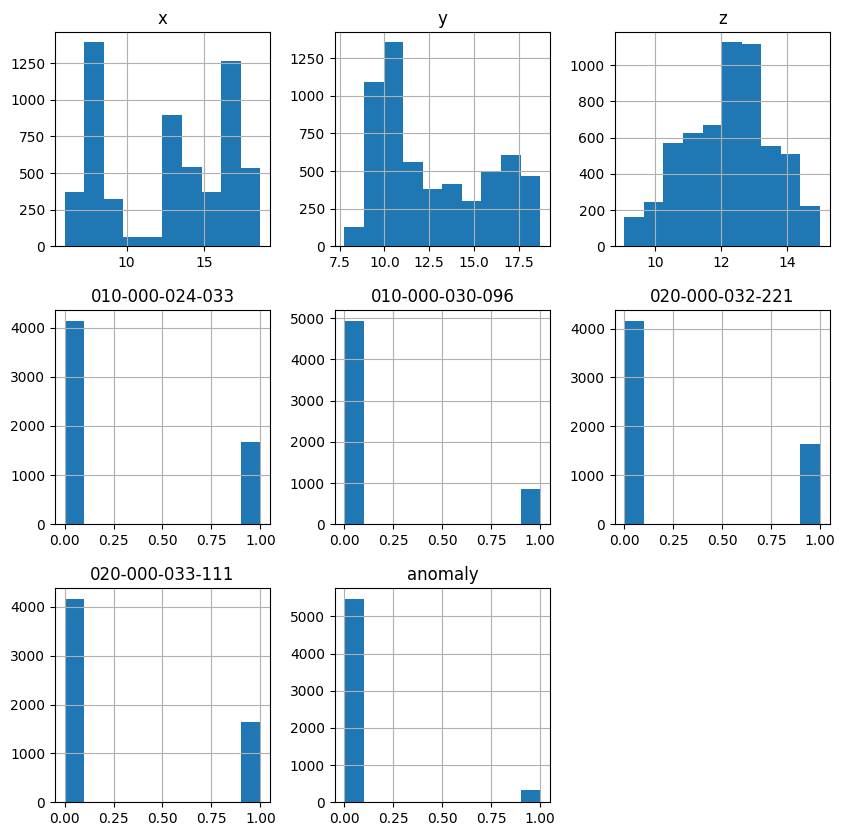

In [ ]:
import matplotlib.pyplot as plt

data.hist(figsize=(10, 10))
plt.show()


Vizualizam relatiile dintre variabile

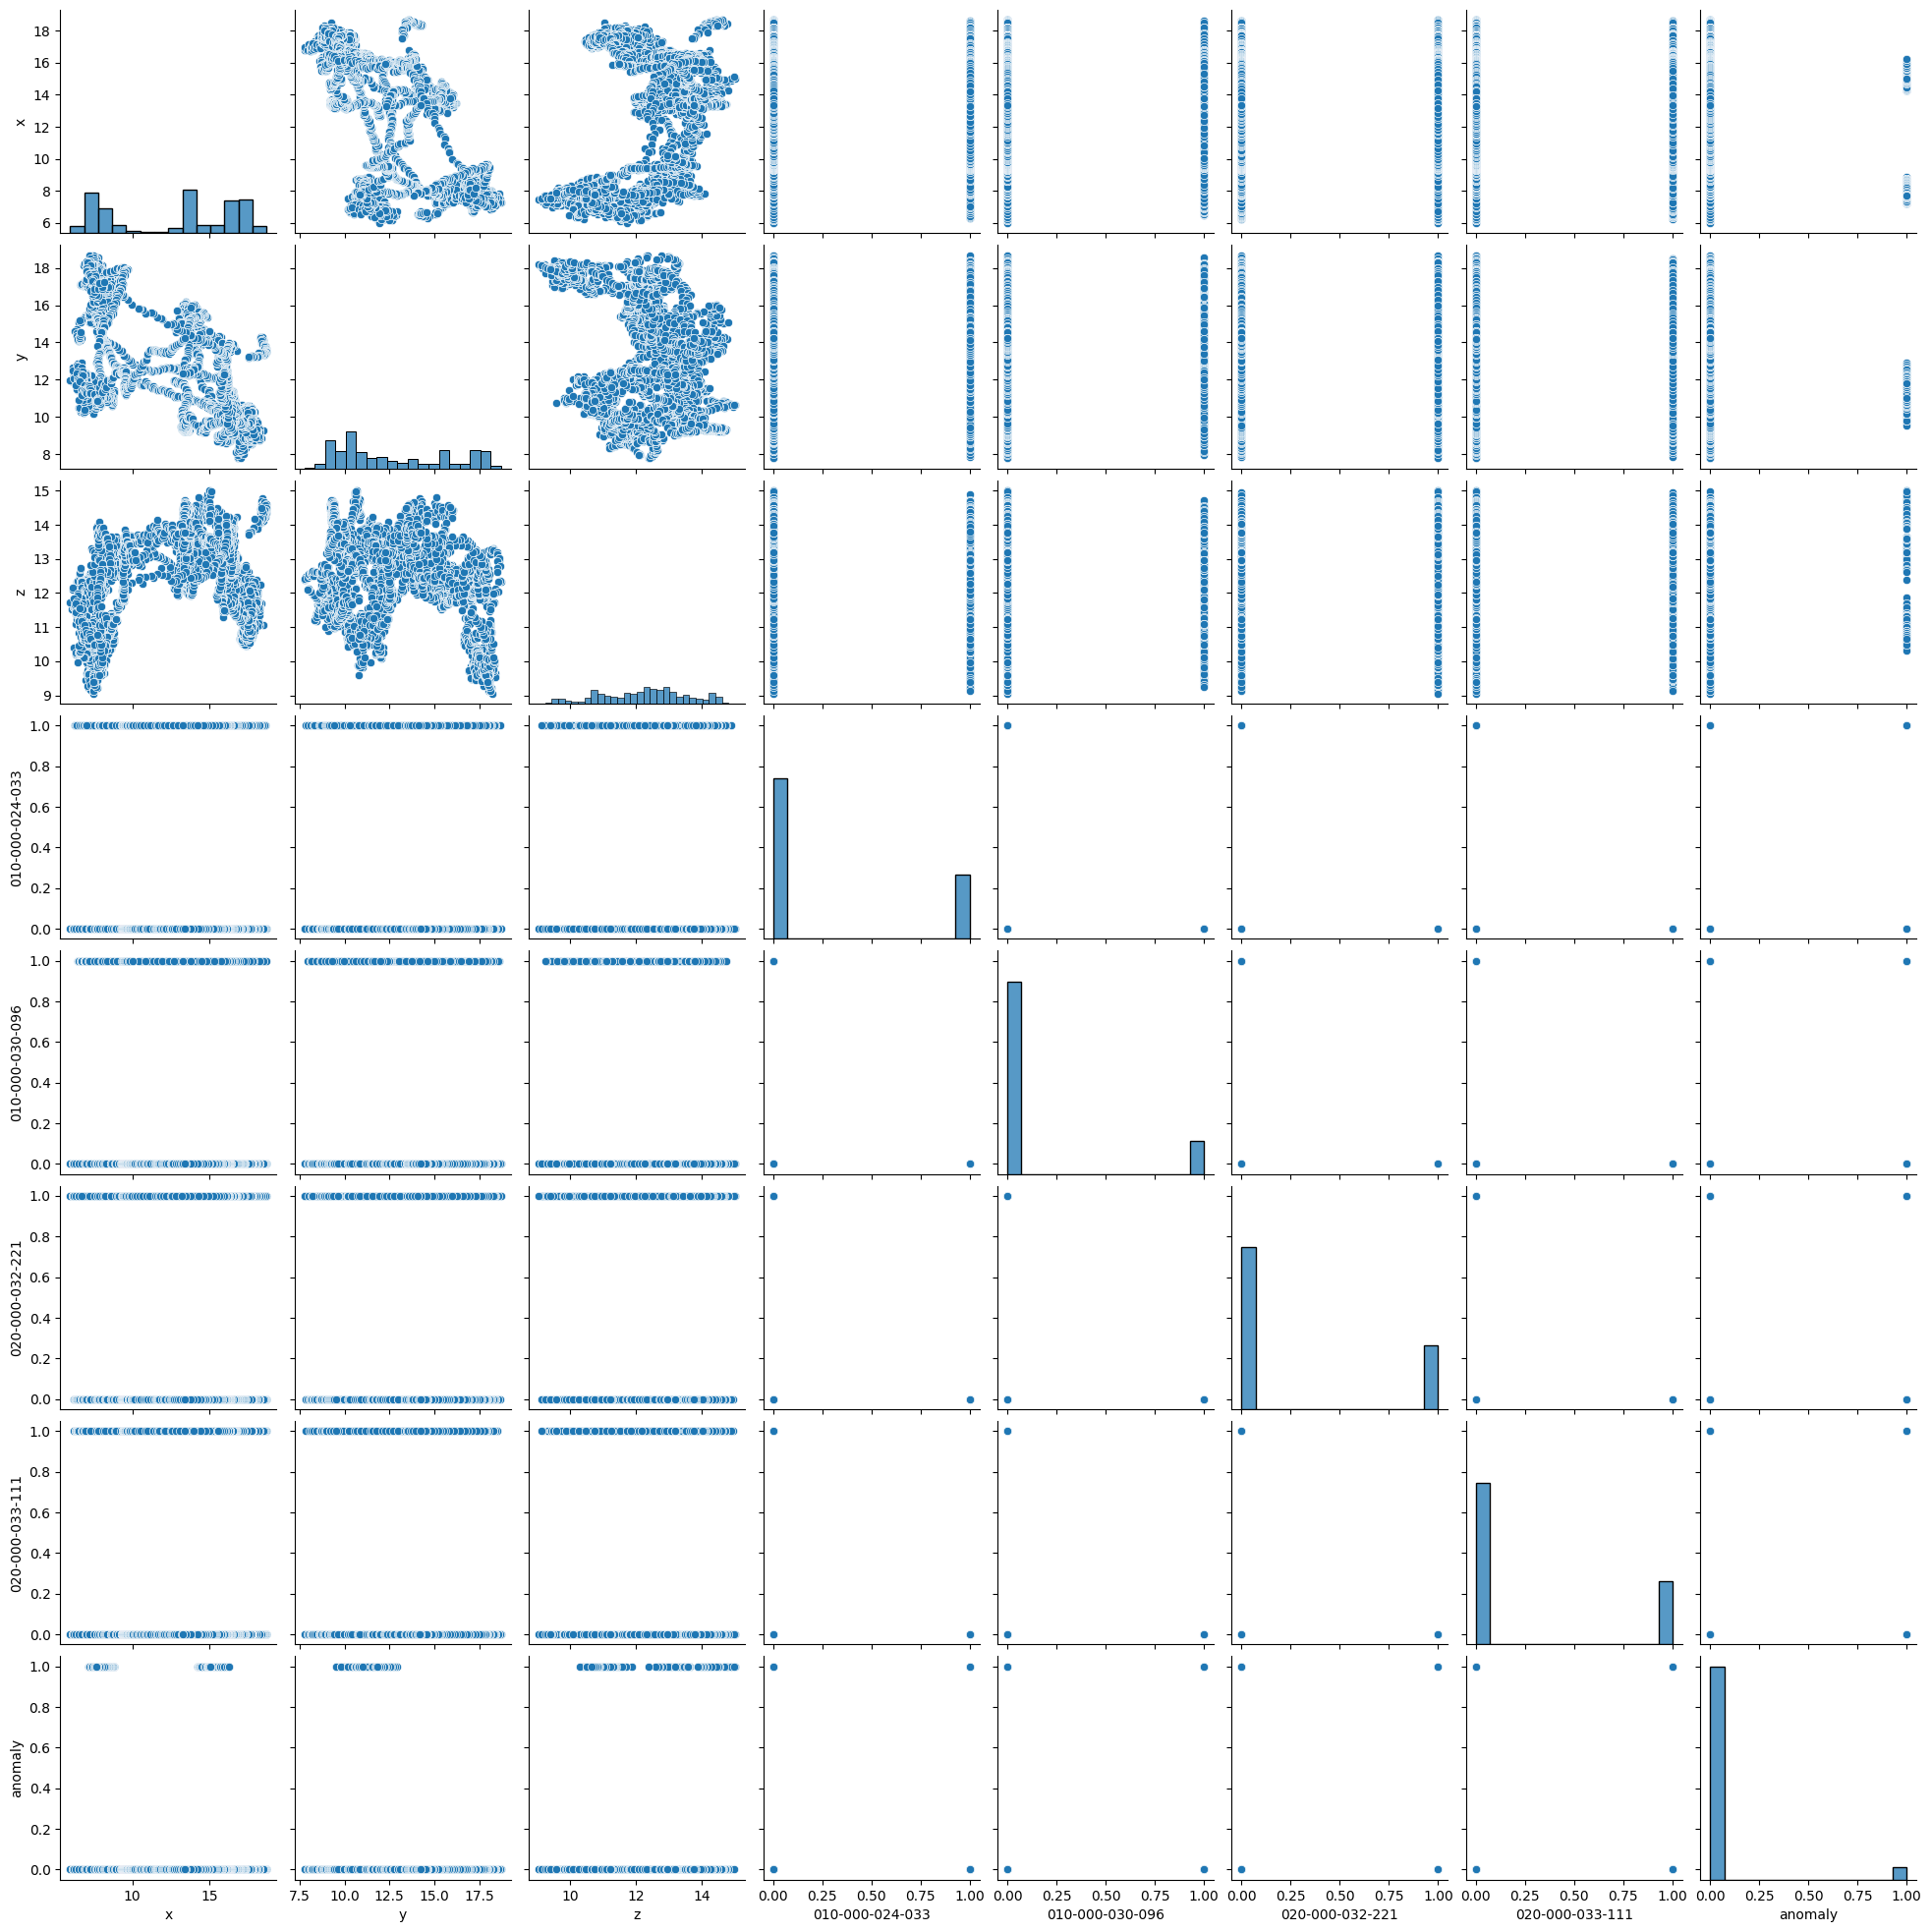

In [ ]:
import seaborn as sns

sns.pairplot(data)


Vom normaliza datele -> vom avea o distributie uniforma!

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


Avem nevoie de PyOD, deci il vom instala si configura.

In [ ]:
pip install pyod


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.2-py3-none-any.whl size=198469 sha256=b5c26900d9c5f59e93f179a2b255449f5d65fd1ded9bf37eff437c6dc1845e18
  Stored in directory: /root/.cache/pip/wheels/77/c2/20/34d1f15b41b701ba69f42a32304825810d680754d509f91391
Successfully built pyod


Vom importa metodele (momentan pentru cele bazate pe distanata)

In [ ]:
from pyod.models.knn import KNN
from pyod.models.ocsvm import OCSVM


Metoda k-Nearest Neighbors (kNN) este o tehnică bazată pe distanță folosită pentru identificarea anomaliilor. Aceasta determină dacă un punct este anormal analizând distanța sa față de punctele vecine cele mai apropiate.

Principiul de bază
kNN pentru detectarea anomaliilor funcționează pe baza următoarelor concepte:

Un punct de date este considerat normal dacă este aproape de majoritatea celorlalte puncte (în funcție de distanță).
Un punct de date este considerat anomal dacă este la o distanță mare față de vecinii săi cei mai apropiați.


One-Class SVM este o tehnică utilizată pentru detectarea anomaliilor bazată pe conceptul de margine maximă din învățarea automată. Este o variantă specială a Support Vector Machines concepută să identifice datele care se abat de la un tipar "normal".

Principiul de bază
One-Class SVM antrenează un model folosind doar date normale sau presupuse a fi majoritar normale.
Obiectivul este de a găsi o hiperplan sau o frontieră care:
Separă datele normale de punctele considerate anomale.
Enclosează cele mai multe puncte normale într-un spațiu definit.

Metoda ABOD (Angle-Based Outlier Detection) este o tehnică bazată pe analiza unghiurilor formate între un punct și toți ceilalți vecini ai săi. Ideea principală este că anomaliile tind să formeze unghiuri inconsistente în comparație cu punctele normale, care formează unghiuri mai uniforme cu vecinii lor.

Principiul de bază
Pentru fiecare punct, metoda ABOD evaluează consistența unghiurilor dintre acesta și vecinii săi.
Normalitate:
Punctele normale sunt situate în zone dense, astfel încât unghiurile dintre un punct și vecinii săi tind să fie mai consistente.
Anomalie:
Punctele anomale sunt situate în afara grupurilor dense, ceea ce face ca unghiurile formate cu vecinii lor să fie mai variabile.

Aplicam metodele:

Metoda KNN

In [ ]:
model_knn = KNN()
model_knn.fit(data_scaled)
labels_knn = model_knn.labels_


Metoda One-Class SVM

In [ ]:
model_ocsvm = OCSVM()
model_ocsvm.fit(data_scaled)
labels_ocsvm = model_ocsvm.labels_


Ajustam parametrii pentru metoda KNN

In [ ]:
model_knn = KNN(n_neighbors=10, contamination=0.1)
model_knn.fit(data_scaled)


KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=10, p=2,
  radius=1.0)

Vom folosi silueta pentru a masura performanta.

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(data_scaled, labels_knn)
print(f"Silhouette Score for KNN: {score}")


Silhouette Score for KNN: 0.05277063938877911


Vom vizualiza anomaliile.

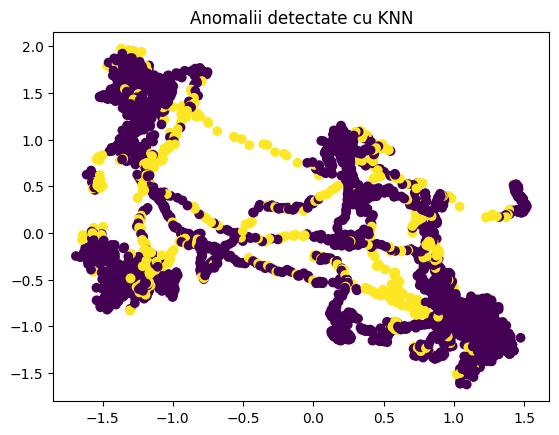

In [ ]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels_knn, cmap='viridis')
plt.title('Anomalii detectate cu KNN')
plt.show()


In [ ]:
print(labels_ocsvm)

[1 1 1 ... 0 0 0]


Vom calcula scorurile.

In [ ]:
scores_ocsvm = model_ocsvm.decision_function(data_scaled)
print(scores_ocsvm)  # Valori mai mici indică anomalii


[125.00570132 115.31897034 104.58436678 ... -24.13216032  25.90502763
 -27.87435197]


Ajustam parametrii pt OCSVM.

In [ ]:
# Kernel liniar cu mai puține anomalii estimate
model_ocsvm = OCSVM(kernel='linear', nu=0.05)
model_ocsvm.fit(data_scaled)


OCSVM(cache_size=200, coef0=0.0, contamination=0.1, degree=3, gamma='auto',
   kernel='linear', max_iter=-1, nu=0.05, shrinking=True, tol=0.001,
   verbose=False)

In [ ]:
from sklearn.metrics import silhouette_score

score_ocsvm = silhouette_score(data_scaled, labels_ocsvm)
print(f"Silhouette Score for One-Class SVM: {score_ocsvm}")


Silhouette Score for One-Class SVM: 0.2813861523101196


Vom face acum vizualizarea!

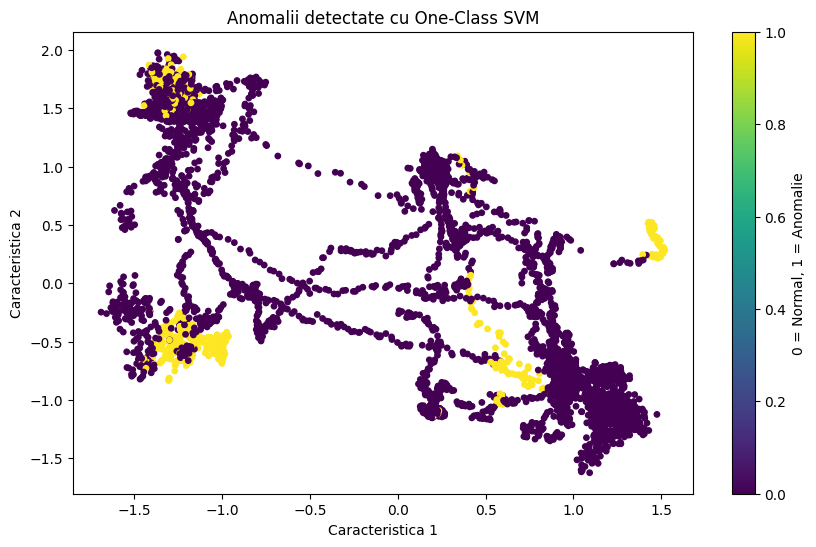

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels_ocsvm, cmap='viridis', s=15)
plt.title('Anomalii detectate cu One-Class SVM')
plt.xlabel('Caracteristica 1')
plt.ylabel('Caracteristica 2')
plt.colorbar(label='0 = Normal, 1 = Anomalie')
plt.show()


In [ ]:
labels_knn = model_knn.labels_  # Etichetele binare (0 = normal, 1 = anomalie)

labels_ocsvm = model_ocsvm.labels_  # Etichetele binare (0 = normal, 1 = anomalie)

from sklearn.metrics import silhouette_score

# Scorul pentru KNN
score_knn = silhouette_score(data_scaled, labels_knn)
print(f"Silhouette Score for KNN: {score_knn}")

# Scorul pentru One-Class SVM
score_ocsvm = silhouette_score(data_scaled, labels_ocsvm)
print(f"Silhouette Score for One-Class SVM: {score_ocsvm}")


Silhouette Score for KNN: 0.05375104251825109
Silhouette Score for One-Class SVM: 0.2813861523101196


In [ ]:
import pandas as pd

results = pd.DataFrame({
    'Metoda': ['KNN', 'One-Class SVM'],
    'Silhouette Score': [score_knn, score_ocsvm]
})
print(results)


          Metoda  Silhouette Score
0            KNN          0.053751
1  One-Class SVM          0.281386


Acum vom implementa si o metoda probalistica/statistica, dupa cum ni s-a cerut

In [ ]:
from pyod.models.abod import ABOD


In [ ]:
model_abod = ABOD(contamination=0.1, n_neighbors=20)


In [ ]:
model_abod.fit(data_scaled)


ABOD(contamination=0.1, method='fast', n_neighbors=20)

In [ ]:
labels_abod = model_abod.labels_
print(labels_abod)


[0 0 0 ... 1 1 1]


In [ ]:
scores_abod = model_abod.decision_function(data_scaled)
print(scores_abod)


[-1265.7898054   -219.80644149  -641.39184843 ...   -54.48039476
   -12.96675355   -25.69112277]


In [ ]:
from sklearn.metrics import silhouette_score

score_abod = silhouette_score(data_scaled, labels_abod)
print(f"Silhouette Score for ABOD: {score_abod}")


Silhouette Score for ABOD: 0.049182690976745894


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled)


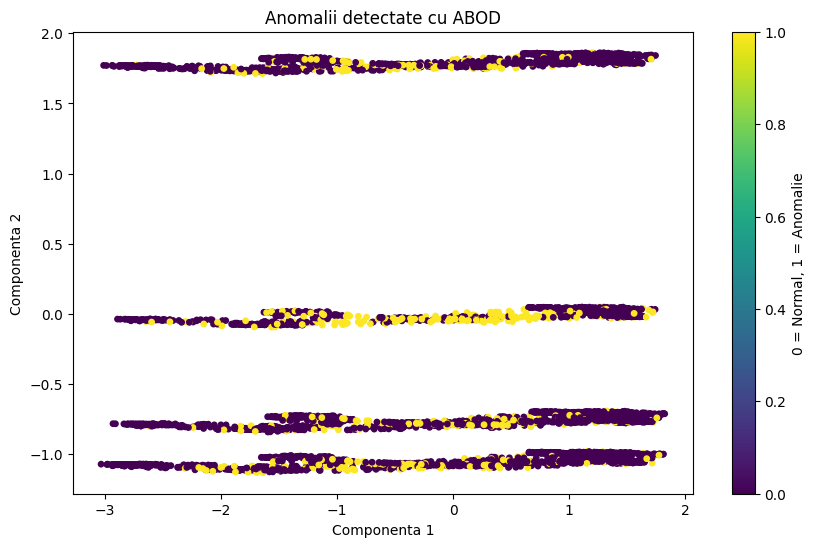

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels_abod, cmap='viridis', s=15)
plt.title('Anomalii detectate cu ABOD')
plt.xlabel('Componenta 1')
plt.ylabel('Componenta 2')
plt.colorbar(label='0 = Normal, 1 = Anomalie')
plt.show()


Concluzii:
Proiectul a demonstrat că metodele implementate sunt eficiente în detectarea anomaliilor locale din setul de date, cum ar fi evenimentele de cădere. Performanța fiecărei metode variază în funcție de tipul și structura datelor, dar utilizarea unei combinații de abordări oferă o soluție robustă. Proiectul oferă o bază solidă pentru aplicații în lumea reală, cu posibilități extinse de optimizare și adaptare.

Bibliografie: Curs Tehnici de Invatare Automata, Ion Necoara